In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import networkx as nx
import re
import numpy as np
import pdb
import pickle
import os
from parsing_utils import *

In [2]:
from datetime import date
today = date.today()
date = today.strftime('%d%b%Y')
print ('Date prefix:', date)

Date prefix: 07Nov2023


Skip to [MetaCyc](#Parse-Metacyc-Molecules)

## Parse Rhea Molecules

In [3]:
EXISTING_GRAPH_PATH = "../../../b-o-t/19Sep2022_updated_whole_metabolic_network_labeled.pkl"
RHEA_SDF = "rhea/rhea.sdf"
# RHEA_SDF = "/Users/Itai/Desktop/test_2.sdf"
RHEA_REACTIONS = "rhea/rhea-reactions.txt"
CHEBI_NAMES_IDS = "rhea/chebiId_name.tsv"

In [4]:
# For some reason the > <GENERIC_COMPOUND> was leading to some issues in the files 
lines_to_write = []
with open(RHEA_SDF,'r') as f:
    lines = f.readlines()
    
    after_generic = False
    for l in lines:
        if '<GENERIC_COMPOUND>' in l:
            after_generic=True
        elif len(l) and after_generic and (l=='$$$$\n' or l[0]=='>' or len(l)==0):
            after_generic=False
        if after_generic:
            pass
        else:
            lines_to_write.append(l)     
new_file_name = RHEA_SDF[:-4]+'_removed_generics.sdf'
with open(new_file_name, 'w') as f:
    f.write(''.join(lines_to_write))

In [5]:
rhea = Chem.SDMolSupplier(new_file_name,)# strictParsing=False, sanitize=False)
rhea_smiles = []
rhea_names = []
chebi_to_smiles = {}
for i, m in enumerate(rhea):
    if m:
        prev_m = m
        smiles = Chem.MolToSmiles(m)
        chebi_to_smiles[m.GetProp('ACCESSION')] = smiles
        if '*' not in smiles:
            rhea_smiles.append(standardize_smiles(smiles))
            rhea_names.append(m.GetProp('Rhea_ascii_name'))
    else:
        print (i)
assert len(rhea_smiles)==len(rhea_names)

print ("{} molecules in rhea".format(len(rhea_smiles)))

[16:02:03] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:02:04] Explicit valence for atom # 12 N, 4, is greater than permitted
[16:02:04] ERROR: Could not sanitize molecule ending on line 216361
[16:02:04] ERROR: Explicit valence for atom # 12 N, 4, is greater than permitted
[16:02:04] WARNING: not removing hydrogen atom with dummy atom neighbors


2328


[16:02:04] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:04] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:05] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:05] Explicit valence for atom # 1 B, 5, is greater than permitted
[16:02:06] WARNING: not removing hydrogen atom without neighbors
[16:02:06] WARNING: not removing hydrogen atom without neighbors
[16:02:06] WARNING: not removing hydrogen atom without neighbors
[16:02:06] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:06] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:06] Warning: molecule is tagged as 3D, but all Z coords are zero
[16:02:06] 

****
Post-condition Violation
Element 'e' not found
Violation occurred on line 93 in file /Users/runner/miniforge3/conda-bld/rdkit_1674051507400/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:02:06] ERROR: Element 'e' not found
[16:02:06] ERROR: moving to the 

9334
9723


[16:02:06] 

****
Post-condition Violation
Element 'hv' not found
Violation occurred on line 93 in file /Users/runner/miniforge3/conda-bld/rdkit_1674051507400/work/Code/GraphMol/PeriodicTable.h
Failed Expression: anum > -1
****

[16:02:06] ERROR: Element 'hv' not found
[16:02:06] ERROR: moving to the beginning of the next molecule
[16:02:06] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:02:06] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:02:06] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:02:07] Warning: molecule is tagged as 3D, but all Z coords are zero


9979 molecules in rhea


[16:02:07] WARNING: not removing hydrogen atom with dummy atom neighbors


In [6]:
if EXISTING_GRAPH_PATH:
    with open(EXISTING_GRAPH_PATH, 'rb') as f:
        g = pickle.load(f)
    smiles_in_graph = [standardize_smiles(n) for n in g.nodes if '>' not in n]

[16:02:07] SMILES Parse Error: syntax error while parsing: CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]
[16:02:07] SMILES Parse Error: Failed parsing SMILES 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]' for input: 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]'
[16:02:07] SMILES Parse Error: syntax error while parsing: CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]
[16:02:07] SMILES Parse Error: Failed parsing SMILES 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]' for input: 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]'
[16:02:07] SMILES Parse Error: syntax error while parsing: CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]
[16:02:07] SMILES Parse Error: Failed parsing SMILES 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]' for input: 'CC(=O)O[C@H](CO[*1])COP(=O)([O-])O[*2]'
[16:02:07] WARNING: not removing hydrogen atom without neighbors
[16:02:07] WARNING: not removing hydrogen atom without neighbors
[16:02:07] SMILES Parse Error: syntax error while parsing: C(O)[C@@H]2([C@H]([C@H](O)[C@@H]([NH3+])[C@@H](O[C@H]1([C@@H]([C@H](O)[C@H](O)[

[16:02:08] SMILES Parse Error: syntax error while parsing: C[C@@H]1CNC(=O)CC[C@]2(C)[C@@H](CC(N)=O)[C@H]3[N-]4[Co]|5|6(|n7cn([C@H]8O[C@H](CO)[C@@H](O[P]([O-])(=O)O1)[C@H]8O)c9cc(C)c(C)cc79)|N%10=C(C=C%11N|5=C([C@@H](CCC(N)=O)C%11(C)C)C(=C24)C)[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)C%10=C(C)C%12=N|6[C@]3(C)[C@@](C)(CC(N)=O)[C@@H]%12CCC(N)=O
[16:02:08] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1CNC(=O)CC[C@]2(C)[C@@H](CC(N)=O)[C@H]3[N-]4[Co]|5|6(|n7cn([C@H]8O[C@H](CO)[C@@H](O[P]([O-])(=O)O1)[C@H]8O)c9cc(C)c(C)cc79)|N%10=C(C=C%11N|5=C([C@@H](CCC(N)=O)C%11(C)C)C(=C24)C)[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)C%10=C(C)C%12=N|6[C@]3(C)[C@@](C)(CC(N)=O)[C@@H]%12CCC(N)=O' for input: 'C[C@@H]1CNC(=O)CC[C@]2(C)[C@@H](CC(N)=O)[C@H]3[N-]4[Co]|5|6(|n7cn([C@H]8O[C@H](CO)[C@@H](O[P]([O-])(=O)O1)[C@H]8O)c9cc(C)c(C)cc79)|N%10=C(C=C%11N|5=C([C@@H](CCC(N)=O)C%11(C)C)C(=C24)C)[C@@H](CCC(N)=O)[C@](C)(CC(N)=O)C%10=C(C)C%12=N|6[C@]3(C)[C@@](C)(CC(N)=O)[C@@H]%12CCC(N)=O'
[16:02:08] SMILES Parse Error: syntax error w

[16:02:09] SMILES Parse Error: syntax error while parsing: C[C@@H](C(=O)N[C@@H](C(=O)[O-])CCC(=O)N[C@@H](CCC[C@@H]([NH3+])C(=O)[O-])C(N[C@H](C)C([O-])=O)=O)NC(=O)[C@@H](C)O[C@H]4([C@H](O[C@@H]3(O[C@H](CO)[C@@H](O[C@H]2([C@H](NC(=O)C)[C@@H](O[C@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](C(=O)[O-])CCC(=O)N[C@@H](CCC[C@@H]([NH3+])C(=O)[O-])C(N[C@H](C)C([O-])=O)=O)[C@H](O[C@@H]1(O[C@H](CO)[C@@H](O[*1])[C@H](O)[C@@H](NC(=O)C)1))[C@@H](CO)O2))[C@H](O)[C@@H](NC(=O)C)3))C5(COC([C@H](NC(=O)C)4)O5))
[16:02:09] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](C(=O)N[C@@H](C(=O)[O-])CCC(=O)N[C@@H](CCC[C@@H]([NH3+])C(=O)[O-])C(N[C@H](C)C([O-])=O)=O)NC(=O)[C@@H](C)O[C@H]4([C@H](O[C@@H]3(O[C@H](CO)[C@@H](O[C@H]2([C@H](NC(=O)C)[C@@H](O[C@H](C)C(=O)N[C@@H](C)C(=O)N[C@@H](C(=O)[O-])CCC(=O)N[C@@H](CCC[C@@H]([NH3+])C(=O)[O-])C(N[C@H](C)C([O-])=O)=O)[C@H](O[C@@H]1(O[C@H](CO)[C@@H](O[*1])[C@H](O)[C@@H](NC(=O)C)1))[C@@H](CO)O2))[C@H](O)[C@@H](NC(=O)C)3))C5(COC([C@H](NC(=O)C)4)O5))' for input: 'C[C@@H](C(=O)N[C@@H](C

[16:02:09] SMILES Parse Error: syntax error while parsing: CC(=O)N[C@H]4([C@H](O[*2])O[C@H](CO[C@@H]3(O[C@H](CO[C@@H]2(O[C@H](CO[C@@H]1(O[C@H](CO[*1])[C@@H](O)[C@H](O)[C@@H](NC(C)=O)1))[C@@H](O)[C@H](O)[C@@H]([NH3+])2))[C@@H](O)[C@H](O)[C@@H](NC(C)=O)3))[C@@H](O)[C@H](O)4)
[16:02:09] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N[C@H]4([C@H](O[*2])O[C@H](CO[C@@H]3(O[C@H](CO[C@@H]2(O[C@H](CO[C@@H]1(O[C@H](CO[*1])[C@@H](O)[C@H](O)[C@@H](NC(C)=O)1))[C@@H](O)[C@H](O)[C@@H]([NH3+])2))[C@@H](O)[C@H](O)[C@@H](NC(C)=O)3))[C@@H](O)[C@H](O)4)' for input: 'CC(=O)N[C@H]4([C@H](O[*2])O[C@H](CO[C@@H]3(O[C@H](CO[C@@H]2(O[C@H](CO[C@@H]1(O[C@H](CO[*1])[C@@H](O)[C@H](O)[C@@H](NC(C)=O)1))[C@@H](O)[C@H](O)[C@@H]([NH3+])2))[C@@H](O)[C@H](O)[C@@H](NC(C)=O)3))[C@@H](O)[C@H](O)4)'
[16:02:09] SMILES Parse Error: syntax error while parsing: CC(=O)N[C@H]4([C@H](O[*2])O[C@H](CO[C@@H]3(O[C@H](CO[C@@H]2(O[C@H](CO[C@@H]1(O[C@H](CO[*1])[C@@H](O)[C@H](O)[C@@H](NC(C)=O)1))[C@@H](O)[C@H](O)[C@@H]([NH3+])2))[C@@H](O)

In [7]:
print (len(set(rhea_smiles) - set(rhea_smiles).intersection(set(smiles_in_graph))))
# set(rhea_smiles) - set(rhea_smiles).intersection(set(smiles_in_graph))

4348


In [8]:
rhea_smiles_to_name = dict(zip(rhea_smiles, rhea_names))
names_not_in_graph = []
smiles_not_in_graph = []
for s in set(rhea_smiles) - set(rhea_smiles).intersection(set(smiles_in_graph)):
    names_not_in_graph.append(clean_name(rhea_smiles_to_name[s]))
    smiles_not_in_graph.append(s)

In [9]:
#### Uncomment to save

# pd.DataFrame({'name':["'"+x+"'" for x in names_not_in_graph],
#               'smiles':["'"+x+"'" for x in smiles_not_in_graph]}).to_csv('rhea/{}_molecules_from_rhea_cleaned_names.csv'.format(date), header=False, sep='\t', index=False)

## Parse Rhea Reactions

In [77]:
chebis_to_rm = [
                'CHEBI:30212', #photon
                'CHEBI:10545', #electron
               ]
patts_ls = []
for c in chebis_to_rm:
    patts_ls.append('\+ ([0-9]+ )?{} |([0-9]+ )?{} \+ |( \+)? ([0-9]+ )?{}$'.format(c,c,c))

rm_patt = re.compile('|'.join(patts_ls))

rhea_reaction_ids = []
rhea_string_reactions = []
rhea_chebi_reactions = []
with open(RHEA_REACTIONS, 'r') as f:
    for line in f.readlines():
        if line[:10] == 'DEFINITION':
            rhea_string_reactions.append(line[12:].strip())
        elif line[:8] == 'EQUATION':
            reaction = line[12:].strip()
            reaction = re.sub(rm_patt, '', reaction)
            rhea_chebi_reactions.append(reaction)
        elif line[:5] == 'ENTRY':
            rhea_reaction_ids.append(line[12:].strip())

In [78]:
p = re.compile('|'.join(patts_ls))
print (re.sub(p, '', 'CHEBI:15377 + CHEBI:30212 = CHEBI:16453'))

print (re.sub(p, '', 'CHEBI:15377 + CHEBI:30212 => CHEBI:16453'))

print (re.sub(p, '', 'CHEBI:15377 + CHEBI:30213 <=> CHEBI:30212'))

print (re.sub(p, '', 'CHEBI:30212 + CHEBI:30213 + CHEBI:302156'))

CHEBI:15377 = CHEBI:16453
CHEBI:15377 => CHEBI:16453
CHEBI:15377 + CHEBI:30213 <=>
CHEBI:30213 + CHEBI:302156


In [79]:
len(rhea_string_reactions)

61812

In [80]:
rhea_reaction_df = pd.DataFrame({'ID': rhea_reaction_ids,
                   'reaction_string': rhea_string_reactions,
                   'reaction_chebi': rhea_chebi_reactions})
rhea_reaction_df

,ID,reaction_string,reaction_chebi
0,RHEA:10000,H2O + pentanamide = NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 = CHEBI:28938 + CHEB...
1,RHEA:10001,H2O + pentanamide => NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 => CHEBI:28938 + CHE...
2,RHEA:10002,NH4(+) + pentanoate => H2O + pentanamide,CHEBI:28938 + CHEBI:31011 => CHEBI:15377 + CHE...
3,RHEA:10003,H2O + pentanamide <=> NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 <=> CHEBI:28938 + CH...
4,RHEA:10004,benzyl isothiocyanate = benzyl thiocyanate,CHEBI:17484 = CHEBI:16017
...,...,...,...
61807,RHEA:74406,2 (S)-lactate(in) + prostaglandin D2(out) <=> ...,2 CHEBI:16651 + CHEBI:57406 <=> 2 CHEBI:16651 ...
61808,RHEA:74407,2 (S)-lactate(in) + thromboxane B2(out) = 2 (S...,2 CHEBI:16651 + CHEBI:90696 = 2 CHEBI:16651 + ...
61809,RHEA:74408,2 (S)-lactate(in) + thromboxane B2(out) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...
61810,RHEA:74409,2 (S)-lactate(out) + thromboxane B2(in) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...


In [81]:
parsed_reactions = []
for i, rxn in enumerate(rhea_chebi_reactions):
    parsed_reactions.append(parse_chebi_reaction(rxn, chebi_to_smiles))
    
    if not len(parse_chebi_reaction(rxn, chebi_to_smiles)):
        print (rxn)

Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:133894'
CHEBI:133894 + 5 CHEBI:58885 = CHEBI:139149 + 5 CHEBI:15378 + 5 CHEBI:58223
Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:133894'
CHEBI:133894 + 5 CHEBI:58885 => CHEBI:139149 + 5 CHEBI:15378 + 5 CHEBI:58223
Could not parse reactants: 'CHEBI:139149'
Could not parse reactants: 'CHEBI:139149'
CHEBI:139149 + 5 CHEBI:15378 + 5 CHEBI:58223 => CHEBI:133894 + 5 CHEBI:58885
Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:133894'
CHEBI:133894 + 5 CHEBI:58885 <=> CHEBI:139149 + 5 CHEBI:15378 + 5 CHEBI:58223
Could not parse reactants: 'CHEBI:134068'
Could not parse reactants: 'CHEBI:134068'
CHEBI:134068 + 5 CHEBI:30616 + 5 CHEBI:15377 = CHEBI:140561 + 5 CHEBI:456215 + 2 CHEBI:15378 + 5 CHEBI:43474
Could not parse reactants: 'CHEBI:134068'
Could not parse reactants: 'CHEBI:134068'
CHEBI:134068 + 5 CHEBI:30616 + 5 CHEBI:15377 => CHEBI:140561 + 5 CHEBI:456215 +

Could not parse reactants: 'CHEBI:57525'
Could not parse reactants: 'CHEBI:57525'
CHEBI:57525 + CHEBI:132521 = CHEBI:57683 + CHEBI:132522 + CHEBI:15378
Could not parse reactants: 'CHEBI:57525'
Could not parse reactants: 'CHEBI:57525'
CHEBI:57525 + CHEBI:132521 => CHEBI:57683 + CHEBI:132522 + CHEBI:15378
Could not parse reactants: 'CHEBI:57683'
Could not parse reactants: 'CHEBI:57683'
CHEBI:57683 + CHEBI:132522 + CHEBI:15378 => CHEBI:57525 + CHEBI:132521
Could not parse reactants: 'CHEBI:57525'
Could not parse reactants: 'CHEBI:57525'
CHEBI:57525 + CHEBI:132521 <=> CHEBI:57683 + CHEBI:132522 + CHEBI:15378
Could not parse reactants: 'CHEBI:139511'
Could not parse reactants: 'CHEBI:139511'
CHEBI:58349 + CHEBI:139511 = 2 CHEBI:15378 + CHEBI:57783 + CHEBI:133980
Could not parse reactants: 'CHEBI:139511'
Could not parse reactants: 'CHEBI:139511'
CHEBI:58349 + CHEBI:139511 => 2 CHEBI:15378 + CHEBI:57783 + CHEBI:133980
Could not parse reactants: 'CHEBI:133980'
Could not parse reactants: 'CHEBI

Could not parse reactants: 'CHEBI:85307'
Could not parse reactants: 'CHEBI:85307'
CHEBI:85307 = CHEBI:85308
Could not parse reactants: 'CHEBI:85307'
Could not parse reactants: 'CHEBI:85307'
CHEBI:85307 => CHEBI:85308
Could not parse reactants: 'CHEBI:85308'
Could not parse reactants: 'CHEBI:85308'
CHEBI:85308 => CHEBI:85307
Could not parse reactants: 'CHEBI:85307'
Could not parse reactants: 'CHEBI:85307'
CHEBI:85307 <=> CHEBI:85308
Could not parse reactants: 'CHEBI:85311'
Could not parse reactants: 'CHEBI:85311'
CHEBI:85311 = CHEBI:58187
Could not parse reactants: 'CHEBI:85311'
Could not parse reactants: 'CHEBI:85311'
CHEBI:85311 => CHEBI:58187
Could not parse reactants: 'CHEBI:58187'
Could not parse reactants: 'CHEBI:58187'
CHEBI:58187 => CHEBI:85311
Could not parse reactants: 'CHEBI:85311'
Could not parse reactants: 'CHEBI:85311'
CHEBI:85311 <=> CHEBI:58187
Could not parse reactants: 'CHEBI:27857'
Could not parse reactants: 'CHEBI:27857'
CHEBI:27857 + CHEBI:43474 = CHEBI:27857 + CHEB

Could not parse reactants: 'CHEBI:137935'
Could not parse reactants: 'CHEBI:137935'
CHEBI:137935 + CHEBI:15377 + CHEBI:15379 = CHEBI:137934 + CHEBI:16240 + CHEBI:35235
Could not parse reactants: 'CHEBI:137935'
Could not parse reactants: 'CHEBI:137935'
CHEBI:137935 + CHEBI:15377 + CHEBI:15379 => CHEBI:137934 + CHEBI:16240 + CHEBI:35235
Could not parse reactants: 'CHEBI:137934'
Could not parse reactants: 'CHEBI:137934'
CHEBI:137934 + CHEBI:16240 + CHEBI:35235 => CHEBI:137935 + CHEBI:15377 + CHEBI:15379
Could not parse reactants: 'CHEBI:137935'
Could not parse reactants: 'CHEBI:137935'
CHEBI:137935 + CHEBI:15377 + CHEBI:15379 <=> CHEBI:137934 + CHEBI:16240 + CHEBI:35235
Could not parse reactants: 'CHEBI:58422'
Could not parse reactants: 'CHEBI:58422'
5 CHEBI:58339 + CHEBI:58422 = 5 CHEBI:58343 + CHEBI:138112 + CHEBI:15378
Could not parse reactants: 'CHEBI:58422'
Could not parse reactants: 'CHEBI:58422'
5 CHEBI:58339 + CHEBI:58422 => 5 CHEBI:58343 + CHEBI:138112 + CHEBI:15378
Could not par

Could not parse reactants: 'CHEBI:16374'
Could not parse reactants: 'CHEBI:16374'
CHEBI:16374 + 2 CHEBI:15378 + CHEBI:30031 = CHEBI:18151 + CHEBI:29806 + 2 CHEBI:15378
Could not parse reactants: 'CHEBI:16374'
Could not parse reactants: 'CHEBI:16374'
CHEBI:16374 + 2 CHEBI:15378 + CHEBI:30031 => CHEBI:18151 + CHEBI:29806 + 2 CHEBI:15378
Could not parse reactants: 'CHEBI:18151'
Could not parse reactants: 'CHEBI:18151'
CHEBI:18151 + CHEBI:29806 + 2 CHEBI:15378 => CHEBI:16374 + 2 CHEBI:15378 + CHEBI:30031
Could not parse reactants: 'CHEBI:16374'
Could not parse reactants: 'CHEBI:16374'
CHEBI:16374 + 2 CHEBI:15378 + CHEBI:30031 <=> CHEBI:18151 + CHEBI:29806 + 2 CHEBI:15378


In [82]:
rhea_reaction_df['reaction_smiles'] = parsed_reactions

In [83]:
dic_f = make_cofactor_dict(np.array(rhea_reaction_df['reaction_chebi'][:]), 10, 0.9, "f")
dic_r = make_cofactor_dict(np.array(rhea_reaction_df['reaction_chebi'][:]), 10, 0.9, "r")


cofs = mergeDict(dic_f, dic_r)

#clean up
for r in cofs:
    cofs[r] = [p for p in cofs[r] if p not in chebi_to_smiles.keys() or '*' in chebi_to_smiles[p]]
cofs = {k:v for k,v in cofs.items() if len(v)}

/Users/Itai/Library/Mobile Documents/com~apple~CloudDocs/from_box/Grad/research/noboi/noboi/parse_reaction_dbs/parsing_utils.py:125: RuntimeWarning: invalid value encountered in divide
  rel_tab = tab/tot_occurences[:,None]


In [84]:
cofs

{'CHEBI:36702': ['CHEBI:30909'],
 'CHEBI:17976': ['CHEBI:16389'],
 'CHEBI:144774': ['CHEBI:18035'],
 'CHEBI:13193': ['CHEBI:17499'],
 'CHEBI:15734': ['CHEBI:17478'],
 'CHEBI:74443': ['CHEBI:65315'],
 'CHEBI:16374': ['CHEBI:18151'],
 'CHEBI:16389': ['CHEBI:17976'],
 'CHEBI:50058': ['CHEBI:29950'],
 'CHEBI:35681': ['CHEBI:17087'],
 'CHEBI:58211': ['CHEBI:57683'],
 'CHEBI:83145': ['CHEBI:83144'],
 'CHEBI:138294': ['CHEBI:29969'],
 'CHEBI:133980': ['CHEBI:139511'],
 'CHEBI:18246': ['CHEBI:18246'],
 'CHEBI:17757': ['CHEBI:62192'],
 'CHEBI:144963': ['CHEBI:64479'],
 'CHEBI:139511': ['CHEBI:133980'],
 'CHEBI:65314': ['CHEBI:65315'],
 'CHEBI:27517': ['CHEBI:27517'],
 'CHEBI:65264': ['CHEBI:64479'],
 'CHEBI:35924': ['CHEBI:30879'],
 'CHEBI:78494': ['CHEBI:78442'],
 'CHEBI:62192': ['CHEBI:17757'],
 'CHEBI:8298': ['CHEBI:8298'],
 'CHEBI:86021': ['CHEBI:86021'],
 'CHEBI:64837': ['CHEBI:29979'],
 'CHEBI:132124': ['CHEBI:24646'],
 'CHEBI:28100': ['CHEBI:28100'],
 'CHEBI:78522': ['CHEBI:78442'],
 'CH

In [85]:
parsed_reactions_no_cofs = []
for i, rxn in enumerate(rhea_chebi_reactions):
    parsed_reactions_no_cofs.append(parse_chebi_reaction(rxn, chebi_to_smiles, cof_dict=cofs, remove_cofs=True))

Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:139149'
Could not parse reactants: 'CHEBI:133894'
Could not parse reactants: 'CHEBI:134068'
Could not parse reactants: 'CHEBI:134068'
Could not parse reactants: 'CHEBI:140561'
Could not parse reactants: 'CHEBI:134068'
Could not parse reactants: 'CHEBI:17029'
Could not parse reactants: 'CHEBI:17029'
Could not parse reactants: 'CHEBI:57704'
Could not parse reactants: 'CHEBI:17029'
Could not parse reactants: 'CHEBI:141005'
Could not parse reactants: 'CHEBI:141005'
Could not parse reactants: 'CHEBI:141005'
Could not parse reactants: 'CHEBI:141005'
Could not parse reactants: 'CHEBI:173114'
Could not parse reactants: 'CHEBI:173114'
Could not parse reactants: 'CHEBI:173114'
Could not parse reactants: 'CHEBI:173114'
Could not parse reactants: 'CHEBI:76539'
Could not parse reactants: 'CHEBI:76539'
Could not parse reactants: 'CHEBI:140312'
Could not parse reactants: 'CHEBI:76539'

Could not parse reactants: 'CHEBI:167457'
Could not parse reactants: 'CHEBI:167457'
Could not parse reactants: 'CHEBI:167457'
Could not parse reactants: 'CHEBI:167457'
Could not parse reactants: 'CHEBI:167891'
Could not parse reactants: 'CHEBI:167891'
Could not parse reactants: 'CHEBI:167891'
Could not parse reactants: 'CHEBI:167891'
Could not parse reactants: 'CHEBI:173112'
Could not parse reactants: 'CHEBI:173112'
Could not parse reactants: 'CHEBI:172959'
Could not parse reactants: 'CHEBI:173112'
Could not parse reactants: 'CHEBI:177354'
Could not parse reactants: 'CHEBI:177354'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177354'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177363'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177355'
Could not parse reactants: 'CHEBI:177354'
Could not parse reactants: 'CHEBI:

In [86]:
rhea_reaction_df['reaction_smiles_no_cofs'] = parsed_reactions_no_cofs

In [87]:
rhea_reaction_df['RHEA_ID'] = rhea_reaction_df['ID'].map(lambda x : int(x.replace('RHEA:','')))
rhea_reaction_df = rhea_reaction_df.drop(columns='ID')

In [89]:
rhea_2_uniprot = pd.read_csv('rhea/rhea2uniprot_sprot.tsv', sep='\t')
grouped_rhea_2_uniprot = rhea_2_uniprot.groupby('RHEA_ID')
grouped_rhea_2_uniprot = grouped_rhea_2_uniprot.aggregate(lambda x : ','.join(list(np.unique(x))))

/var/folders/cb/fq3bwnj51bv2d7d694kx77pm0000gp/T/ipykernel_23389/4227166972.py:3: FutureWarning: ['MASTER_ID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_rhea_2_uniprot = grouped_rhea_2_uniprot.aggregate(lambda x : ','.join(list(np.unique(x))))


In [90]:
rhea_2_uniprot

,RHEA_ID,DIRECTION,MASTER_ID,ID
0,10008,UN,10008,O17433
1,10008,UN,10008,O34564
2,10008,UN,10008,P0C0L2
3,10008,UN,10008,P0C0L3
4,10008,UN,10008,P23161
...,...,...,...,...
354746,76563,UN,76563,Q9Y5Q0
354747,76564,LR,76563,A4IFP3
354748,76564,LR,76563,Q8K1P9
354749,76564,LR,76563,Q9JJE7


In [105]:
all_uniprot_ids = rhea_2_uniprot['ID'].tolist()

In [92]:
rhea_reaction_df = rhea_reaction_df.merge(grouped_rhea_2_uniprot, how='left', on='RHEA_ID')

In [93]:
rhea_reaction_df

,reaction_string,reaction_chebi,reaction_smiles,reaction_smiles_no_cofs,RHEA_ID,DIRECTION,ID
0,H2O + pentanamide = NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 = CHEBI:28938 + CHEB...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10000,NaN,NaN
1,H2O + pentanamide => NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 => CHEBI:28938 + CHE...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10001,NaN,NaN
2,NH4(+) + pentanoate => H2O + pentanamide,CHEBI:28938 + CHEBI:31011 => CHEBI:15377 + CHE...,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,10002,NaN,NaN
3,H2O + pentanamide <=> NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 <=> CHEBI:28938 + CH...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10003,NaN,NaN
4,benzyl isothiocyanate = benzyl thiocyanate,CHEBI:17484 = CHEBI:16017,S=C=NCc1ccccc1>>N#CSCc1ccccc1,S=C=NCc1ccccc1>>N#CSCc1ccccc1,10004,NaN,NaN
...,...,...,...,...,...,...,...
61807,2 (S)-lactate(in) + prostaglandin D2(out) <=> ...,2 CHEBI:16651 + CHEBI:57406 <=> 2 CHEBI:16651 ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74406,NaN,NaN
61808,2 (S)-lactate(in) + thromboxane B2(out) = 2 (S...,2 CHEBI:16651 + CHEBI:90696 = 2 CHEBI:16651 + ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74407,UN,"Q00910,Q92959,Q9EPT5"
61809,2 (S)-lactate(in) + thromboxane B2(out) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74408,NaN,NaN
61810,2 (S)-lactate(out) + thromboxane B2(in) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74409,NaN,NaN


In [94]:
np.unique([rhea_reaction_df.loc[61808, 'ID']])

array(['Q00910,Q92959,Q9EPT5'], dtype='<U20')

In [95]:
rhea_reaction_df.groupby('reaction_smiles_no_cofs').head()

,reaction_string,reaction_chebi,reaction_smiles,reaction_smiles_no_cofs,RHEA_ID,DIRECTION,ID
0,H2O + pentanamide = NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 = CHEBI:28938 + CHEB...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10000,NaN,NaN
1,H2O + pentanamide => NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 => CHEBI:28938 + CHE...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10001,NaN,NaN
2,NH4(+) + pentanoate => H2O + pentanamide,CHEBI:28938 + CHEBI:31011 => CHEBI:15377 + CHE...,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,10002,NaN,NaN
3,H2O + pentanamide <=> NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 <=> CHEBI:28938 + CH...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10003,NaN,NaN
4,benzyl isothiocyanate = benzyl thiocyanate,CHEBI:17484 = CHEBI:16017,S=C=NCc1ccccc1>>N#CSCc1ccccc1,S=C=NCc1ccccc1>>N#CSCc1ccccc1,10004,NaN,NaN
...,...,...,...,...,...,...,...
61807,2 (S)-lactate(in) + prostaglandin D2(out) <=> ...,2 CHEBI:16651 + CHEBI:57406 <=> 2 CHEBI:16651 ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74406,NaN,NaN
61808,2 (S)-lactate(in) + thromboxane B2(out) = 2 (S...,2 CHEBI:16651 + CHEBI:90696 = 2 CHEBI:16651 + ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74407,UN,"Q00910,Q92959,Q9EPT5"
61809,2 (S)-lactate(in) + thromboxane B2(out) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74408,NaN,NaN
61810,2 (S)-lactate(out) + thromboxane B2(in) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74409,NaN,NaN


In [100]:
rhea_reaction_df.loc[rhea_reaction_df['ID'].isna(), 'ID'] = ''

In [101]:
rhea_reaction_df

,reaction_string,reaction_chebi,reaction_smiles,reaction_smiles_no_cofs,RHEA_ID,DIRECTION,ID
0,H2O + pentanamide = NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 = CHEBI:28938 + CHEB...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10000,NaN,
1,H2O + pentanamide => NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 => CHEBI:28938 + CHE...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10001,NaN,
2,NH4(+) + pentanoate => H2O + pentanamide,CHEBI:28938 + CHEBI:31011 => CHEBI:15377 + CHE...,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,[NH4+].CCCCC(=O)[O-]>>O.CCCCC(N)=O,10002,NaN,
3,H2O + pentanamide <=> NH4(+) + pentanoate,CHEBI:15377 + CHEBI:16459 <=> CHEBI:28938 + CH...,O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],O.CCCCC(N)=O>>[NH4+].CCCCC(=O)[O-],10003,NaN,
4,benzyl isothiocyanate = benzyl thiocyanate,CHEBI:17484 = CHEBI:16017,S=C=NCc1ccccc1>>N#CSCc1ccccc1,S=C=NCc1ccccc1>>N#CSCc1ccccc1,10004,NaN,
...,...,...,...,...,...,...,...
61807,2 (S)-lactate(in) + prostaglandin D2(out) <=> ...,2 CHEBI:16651 + CHEBI:57406 <=> 2 CHEBI:16651 ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74406,NaN,
61808,2 (S)-lactate(in) + thromboxane B2(out) = 2 (S...,2 CHEBI:16651 + CHEBI:90696 = 2 CHEBI:16651 + ...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74407,UN,"Q00910,Q92959,Q9EPT5"
61809,2 (S)-lactate(in) + thromboxane B2(out) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74408,NaN,
61810,2 (S)-lactate(out) + thromboxane B2(in) => 2 (...,2 CHEBI:16651 + CHEBI:90696 => 2 CHEBI:16651 +...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,C[C@H](O)C(=O)[O-].C[C@H](O)C(=O)[O-].CCCCC[C@...,74409,NaN,


In [102]:
grouped_df = rhea_reaction_df.groupby('reaction_smiles_no_cofs').aggregate(lambda x : list(np.unique(x)))
grouped_df['reaction_smiles_no_cofs'] = grouped_df.index
grouped_df['reaction_smiles'] = grouped_df['reaction_smiles'].map(lambda x: x[0])
grouped_df['reaction_chebi'] = grouped_df['reaction_chebi'].map(lambda x : x[0])
grouped_df['reaction_string'] = grouped_df['reaction_string'].map(lambda x : x[0])
grouped_df.index = range(len(grouped_df))

/var/folders/cb/fq3bwnj51bv2d7d694kx77pm0000gp/T/ipykernel_23389/1082088537.py:1: FutureWarning: ['DIRECTION'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = rhea_reaction_df.groupby('reaction_smiles_no_cofs').aggregate(lambda x : list(np.unique(x)))


In [103]:
grouped_df[grouped_df['reaction_smiles'].map(lambda x : '*' not in x)]

,reaction_string,reaction_chebi,reaction_smiles,RHEA_ID,ID,reaction_smiles_no_cofs
0,"(+)-sesamin + (6S)-5,6,7,8-tetrahydrofolyl-(ga...",2 CHEBI:13193 + CHEBI:60530 + CHEBI:15377 <=> ...,,"[10068, 10069, 10070, 10071, 10256, 10257, 102...","[, A0A024B7W1,A0A0K2H5X8,A0A0S2T050,A0A142I5B9...",
1487,a dolichyl beta-D-mannosyl phosphate + L-seryl...,CHEBI:58211 + CHEBI:29999 <=> CHEBI:137321 + C...,,"[17377, 17378, 17380]","[, F1Q8R9,F1QF89,L8F4Z2,O13898,O42933,O74189,P...",*N[C@@H](CO)C(*)=O>>*N[C@@H](CO[C@H]1O[C@H](CO...
1980,a dolichyl beta-D-mannosyl phosphate + L-threo...,CHEBI:58211 + CHEBI:30013 <=> CHEBI:137323 + C...,,"[53396, 53397, 53399]","[, F1Q8R9,F1QF89,L8F4Z2,O13898,O42933,O74189,P...",*N[C@H](C(*)=O)[C@@H](C)O>>*N[C@H](C(*)=O)[C@@...
2779,[(1->4)-alpha-D-glucosyl](n+1) + a ribonucleos...,CHEBI:15444 + CHEBI:57930 + CHEBI:15378 => CHE...,,[15875],[],*[C@@H]1O[C@H](COP(=O)([O-])OP(=O)([O-])[O-])[...
2817,a plastoquinone + an L-alpha-amino acid + H2O ...,CHEBI:17757 + CHEBI:59869 + CHEBI:15377 <=> CH...,,"[53020, 53021, 53023]","[, Q55629]",*[C@H]([NH3+])C(=O)[O-].O>>[1*]C(=O)C(=O)[O-]....
...,...,...,...,...,...,...
28535,(S)-nornicotine + formaldehyde + H(+) + H2O + ...,CHEBI:190184 + CHEBI:16842 + CHEBI:15378 + CHE...,c1cncc([C@@H]2CCC[NH2+]2)c1.C=O.[H+].O.Cc1cc2n...,[71001],[],c1cncc([C@@H]2CCC[NH2+]2)c1.C=O.[H+].O.Cc1cc2n...
28536,"6,7-dihydropteridine + H(+) + NADH => 5,6,7,8-...",CHEBI:30156 + CHEBI:15378 + CHEBI:57945 => CHE...,c1ncc2c(n1)=NCCN=2.[H+].NC(=O)C1=CN([C@@H]2O[C...,[17871],"[P09417,P11348,Q3T0Z7,Q8BVI4,Q8MJ30]",c1ncc2c(n1)=NCCN=2.[H+].NC(=O)C1=CN([C@@H]2O[C...
28537,"6,7-dihydropteridine + H(+) + NADPH => 5,6,7,8...",CHEBI:30156 + CHEBI:15378 + CHEBI:57783 => CHE...,c1ncc2c(n1)=NCCN=2.[H+].NC(=O)C1=CN([C@@H]2O[C...,[17867],"[P09417,P11348,Q3T0Z7,Q8BVI4,Q8MJ30]",c1ncc2c(n1)=NCCN=2.[H+].NC(=O)C1=CN([C@@H]2O[C...
28538,"5,6,7,8-tetrahydropteridine + NAD(+) <=> 6,7-d...",CHEBI:28889 + CHEBI:57540 <=> CHEBI:30156 + CH...,c1ncc2c(n1)NCCN2.NC(=O)c1ccc[n+]([C@@H]2O[C@H]...,"[17869, 17870, 17872]","[, P09417,P11348,P38489,Q3T0Z7,Q86A17,Q8BVI4,Q...",c1ncc2c(n1)NCCN2.NC(=O)c1ccc[n+]([C@@H]2O[C@H]...


In [106]:
# Uncomment to save

grouped_df[grouped_df['reaction_smiles'].map(lambda x : '*' not in x)].to_csv('rhea/{}_rhea_reaction_smiles_no_cofs.csv'.format(date), sep='\t', index=False)

CHEBI:33019 + CHEBI:193010 => CHEBI:57623 + CHEBI:193004


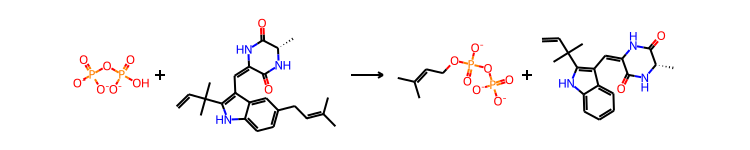

In [107]:
# sanity check 

rxn = grouped_df.loc[23474,'reaction_chebi']
print (rxn)
AllChem.ReactionFromSmarts(parse_chebi_reaction(rxn, chebi_to_smiles, cof_dict=cofs, remove_cofs=True), useSmiles=True)

## Sanity  check on cofactors

In [24]:
chebi_df = pd.read_csv(CHEBI_NAMES_IDS, sep='\t', header=None)
# chebi_to_name = chebi_df[0].to_dict()
chebi_df[0] = chebi_df[0].map(lambda x : x.strip())
chebi_df[1] = chebi_df[1].map(lambda x : x.strip())

In [25]:
chebi_to_name_dict = pd.Series(chebi_df[1].values,index=chebi_df[0].values).to_dict()

for k in list(cofs.keys()):
    try:
        s_L = chebi_to_smiles[k]
        s_R = [chebi_to_smiles[r] for r in cofs[k]]
        print ("{} : {}".format(s_L, s_R))
        cof_L = chebi_to_name_dict[k]
        cof_R = [chebi_to_name_dict[r] for r in cofs[k]]
        print ("{} : {}".format(cof_L, cof_R))
    except KeyError:
        print ("Can't convert {}".format(k))
        
# for v in list(dic_f.values()) + list(dic_r.values()):
#     for entry in v:
#         try:
#             print (chebi_to_name_dict[entry])
#         except KeyError:
#             print ("Can't convert {}".format(entry))

*S : ['*[H]']
Can't convert CHEBI:29917
*C(=O)O[C@H](CO[1*])COP(=O)([O-])OCC[N+](C)(C)C : ['*OC[C@@H](O)COP(=O)([O-])OCC[N+](C)(C)C']
1-O-alkyl-2-acyl-sn-glycero-3-phosphocholine : ['1-O-alkyl-sn-glycero-3-phosphocholine']
[H]*[H] : ['*']
AH2 : ['A']
Can't convert CHEBI:18246
*O[C@H]1[C@@H](O)[C@H](c2c[nH]c(=O)[nH]c2=O)O[C@@H]1COP(*)(=O)[O-] : ['*O[C@H]1[C@@H](O)[C@H](n2ccc(=O)[nH]c2=O)O[C@@H]1COP(*)(=O)[O-]']
Can't convert CHEBI:65314
Can't convert CHEBI:62192
[1*]c1c([2*])c(O)c([3*])c([4*])c1O : ['[1*]C1=C([2*])C(=O)C([3*])=C([4*])C1=O']
a quinol : ['a quinone']
*P(=O)([O-])OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1OC(=O)C[NH3+] : ['*P(=O)([O-])OC[C@H]1O[C@@H](n2cnc3c(N)ncnc32)[C@H](O)[C@@H]1O']
Can't convert CHEBI:78522
*N[C@@H](CCCCNC(=O)CCCC[C@@H]1SC[C@H]2[C@@H]1NC(=O)N2C(=O)[O-])C(*)=O : ['*N[C@@H](CCCCNC(=O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21)C(*)=O']
Can't convert CHEBI:83145
Can't convert CHEBI:28100
*N[C@@H](*)C(*)=O : ['*N[C@@H](*)C(*)=O']
Can't convert CHEBI:83228
*N[

## Parse Metacyc Molecules

In [26]:
METACYC_REACTIONS = "metacyc/reactions.dat"
METACYC_COMPOUND_LINKS = "metacyc/compound-links.dat"
METACYC_MOL_FILES = "../../../molecule_databases/Metacyc_v26.5/data/MetaCyc-MOLfiles/"

In [27]:
# metacyc_reactions = pd.read_csv(METACYC_REACTIONS, sep='\t', header=None)
with open(METACYC_COMPOUND_LINKS, 'r') as f:
    a = f.readlines()

split_lines = [l.split('\t') for l in a]
name_smiles = []
for l in split_lines:
    if len(l) >= 3:
        name_smiles.append((l[0].strip().lower(),standardize_smiles(l[2].strip())))
        
metacyc_name_to_smiles_dict = dict(name_smiles)
print (len(metacyc_name_to_smiles_dict))

[21:39:39] Explicit valence for atom # 29 N, 4, is greater than permitted
[21:39:39] Explicit valence for atom # 29 N, 4, is greater than permitted
[21:39:39] Conflicting single bond directions around double bond at index 24.
[21:39:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:39] Conflicting single bond directions around double bond at index 3.
[21:39:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:39] Conflicting single bond directions around double bond at index 3.
[21:39:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:39] Conflicting single bond directions around double bond at index 17.
[21:39:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:39] Conflicting single bond directions around double bond at index 16.
[21:39:39]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:39] Conflicting single bond directions around d

fixed smiles : CCC1(\C2(/C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=C(C(/C)=1)/N=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C=O))7))))) CCC1=C(C)C2=CC3=C(C=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=CC1=N2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C@@H]5C
fixed smiles : CCC1(\C2(/C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=C(C(/C)=1)/N=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C)C(\C(/[C@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C=O))7))))) CCC1=C(C)C2=CC3=C(C=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=CC1=N2)N7[Mg]N43)C(=O)[C@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C@@H]5C


[21:39:40] Explicit valence for atom # 9 B, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 55 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 55 C, 5, is greater than permitted
[21:39:41] Conflicting single bond directions around double bond at index 7.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 3.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.


fixed smiles : CC[C@@H]1([C@@H](C)C2(\N=C1\C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CC/C=C(C)/CC/C=C(C)/CCC=C(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C(C)=O))7))))) CC[C@H]1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=C2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC=C(C)CCC=C(C)CCC=C(C)C)[C@@H]5C)[C@@H]1C
fixed smiles : C=CC4(\C(/C)=C5(\C=C7([C@@H](C)[C@H](CCC(=O)[O-])C(\C6(/[C@@H-](C(OC)=O)C(=O)C1(\C(\N2([Mg]N(C(/C=C3(C(/CO)=C(CC)\C(/C=C(C(\C)=1)\2)=N3))=4)5))=6)))=N7))) C=CC1=C2C=C3N=C(C=C4C(C)=C5C(=O)[C@H](C(=O)OC)C6=C5N4[Mg]N2C(=C1C)C=C1N=C6[C@@H](CCC(=O)[O-])[C@@H]1C)C(CC)=C3CO
fixed smiles : C=CC4(\C(/C)=C5(\C=C7([C@@H](C)[C@H](CCC(=O)[O-])C(\C6(/[C@@H-](C(OC)=O)C(=O)C1(\C(\N2([Mg]N(C(/C=C3(C(/C)=C(C=C)/C(\C=C(C(\C)=1)/2)=N3))=4)5))=6)))=N7))) C=CC1=C(C)C2=CC3=C(C=C)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=CC1=N2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)[O-])[C@@H]5C
fixed smiles : CCC1(\C2(/C=C7(C(\C)=C3(C4(\N([Mg]N6(C(/C=C(C

[21:39:41] Conflicting single bond directions around double bond at index 17.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 20.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 23.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Explicit valence for atom # 18 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 18 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 18 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 18 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 58 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 58 C, 5, is greater than permitted
[21:39:41] Explicit valence for atom # 55 C, 5, is greater than permitted
[2

fixed smiles : C/C=C7([C@@H](C)C1(\N=C(\C=C6(C(\C)=C2(C3(\N([Mg]N5(C(\C=1)=C(C(/C)=C(\C=C4([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)2)=3)=N4))/5)/C(C)=O))6))))\7)) CC=C1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=C2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C@@H]5C)[C@@H]1C
fixed smiles : C/C=C7([C@@H](C)C1(\N=C(\C=C6(C(\C)=C2(C3(\N([Mg]N5(C(\C=1)=C(C(/C)=C(\C=C4([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCC=C(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)2)=3)=N4))/5)/C(C)=O))6))))\7)) CC=C1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=C2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCC=C(C)C)[C@@H]5C)[C@@H]1C
fixed smiles : C=CC4(\C(/C)=C5(\C=C7([C@@H](C)[C@H](CCC(=O)[O-])C(\C6(/[C@@H-](C(OC)=O)C(=O)C1(\C(\N2([Mg]N(C(/C=C3(C(/C(O)O)=C(C=C)\C(/C=C(C(\C)=1)\2)=N3))=4)5))=6)))=N7))) C=CC1=C(C(O)O)C2=CC3=C(C=C)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=CC1=N2)N7[Mg]N43)C(=O)[

[21:39:41] Conflicting single bond directions around double bond at index 33.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 38.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 35.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 40.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 37.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Conflicting single bond directions around double bond at index 42.
[21:39:41]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:41] Explicit valence for atom # 9

fixed smiles : COC5(\C=C([C@H]4([C@@]3(C([C@H]1(C[C@]([C@](C(=O)O1)([C@@H-](C(C2(\C=C/C=C\C=2))=O)3)O)4O))O)O))/OC(/C=5)=O) COC1=CC(=O)OC([C@H]2[C@]3(O)C(O)[C@H]4C[C@]2(O)[C@](O)(C(=O)O4)[C@H]3C(=O)C2=CC=CC=C2)=C1


[21:39:42] Conflicting single bond directions around double bond at index 17.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond directions around double bond at index 17.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond directions around double bond at index 12.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond directions around double bond at index 17.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond directions around double bond at index 17.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond directions around double bond at index 12.
[21:39:42]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:42] Conflicting single bond direc

[21:39:43] Conflicting single bond directions around double bond at index 7.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directions around double bond at index 12.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directions around double bond at index 12.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directions around double bond at index 17.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directions around double bond at index 9.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directions around double bond at index 14.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] Conflicting single bond directi

fixed smiles : CC[C@@H]1([C@@H](C)C2(\N=C1\C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CC/C=C(C)/CCC[C@H](C)CCCC(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C(C)=O))7))))) CC[C@H]1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=C2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC=C(C)CCC[C@H](C)CCCC(C)C)[C@@H]5C)[C@@H]1C
fixed smiles : C=C[C@@H]1([C@@H](C)C2(\N=C1\C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C(C)=O))7))))) C=C[C@H]1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5N=C(C6=C7C(=C(C)C(=C2)N7[Mg]N43)C(=O)[C@@H]6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C@@H]5C)[C@@H]1C
fixed smiles : CC[C@@H]1([C@@H](C)C2(\N=C1\C=C7(C(\C)=C3(C4(\N([Mg]N6(C(\C=2)=C(C(/C)=C(\C=C5([C@@H](C)[C@H](CCC(=O)OC/C=C(C)/CCC[C@H](C)CCC[C@H](C)CCCC(C)C)C(\C(/[C@@H-](C(OC)=O)C(=O)3)=4)=N5))/6)/C(C)=O))7))))) CC[C@H]1C2=NC(=CC3=C(C(C)=O)C(C)=C4C=C5

[21:39:43] Conflicting single bond directions around double bond at index 12.
[21:39:43]   BondStereo set to STEREONONE and single bond directions set to NONE.
[21:39:43] SMILES Parse Error: syntax error while parsing: C[C@H](CCC[C@H](C)CCC[C@@H](CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO[C@@H](C(C)OCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO)CO)C)CCC[C@@HH]CCO.C
[21:39:43] SMILES Parse Error: Failed parsing SMILES 'C[C@H](CCC[C@H](C)CCC[C@@H](CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO[C@@H](C(C)OCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO)CO)C)CCC[C@@HH]CCO.C' for input: 'C[C@H](CCC[C@H](C)CCC[C@@H](CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO[C@@H](C(C)OCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CCC[C@H](C)CC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCC[C@@H](C)CCO)CO)C)CCC[C@@HH]CCO.C'
[21:39:43] SMILES Parse Error: syntax error while parsing: C[C@H](CCC[C@H](C)CCC[C@@H](CC[C@@H](C)

In [28]:
for molfile in os.listdir(METACYC_MOL_FILES):
    molname = molfile.replace('.mol','').lower()
    mol = Chem.MolFromMolFile(os.path.join(METACYC_MOL_FILES,molfile))
    if mol:
        if molname not in metacyc_name_to_smiles_dict.keys():
            smiles = standardize_smiles(Chem.MolToSmiles(mol))
            metacyc_name_to_smiles_dict[molname] = smiles
    else:
        print (molname, 'was not included')
print (len(metacyc_name_to_smiles_dict))

[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:43] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom without neighbors
[21:39:44] Explicit valence for atom # 0 C, 6, is greater t

cpd-18407 was not included
nifb-with-l-cluster was not included
cpd-21244 was not included
cpd-41 was not included


[21:39:44] Explicit valence for atom # 14 C, 10, is greater than permitted
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:44] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:45] WARNING: not removing hydrogen atom wi

cpd0-2347 was not included


[21:39:45] Explicit valence for atom # 26 O, 3, is greater than permitted
[21:39:46] Explicit valence for atom # 14 C, 10, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors


cpd-11696 was not included
nifdk-m-cluster was not included
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C(O)O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C(O)O)=C1CC(*)*


[21:39:46] Explicit valence for atom # 136 O, 3, is greater than permitted


cpd-7865 was not included


[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted


fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)OC/C=C(\C)CC/C=C(\C)CCC=C(C)C)[C@H](C)C4=C7C)C(C=O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)OCC=C(C)CCC=C(C)CCC=C(C)C)[C@H](C)C4=C7C)C(C=O)=C1CC(*)*
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(CO)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(CO)=C1CC(*)*


[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:46] Explicit valence for atom # 9 N, 4, is greater than permitted


fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C(O)O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C(O)O)=C1CC(*)*


[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:46] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:47] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:47] Explicit valence for atom # 34 N, 4, is 

fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)OC/C=C(\C)CC/C=C(\C)CCC=C(C)C)[C@H](C)C4=C7C)C(C)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)OCC=C(C)CCC=C(C)CCC=C(C)C)[C@H](C)C4=C7C)C(C)=C1CC(*)*
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(CO)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(CO)=C1CC(*)*
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C=C)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C=C)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)*
cpd-11679 was not included
reduced-hydrogenase-3 was not included
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)OC/C=C(\C)CC/C=C(\C)CCC=C(C)C)[C@H](C)C4=C7)C(C)=C1CC(*)* *Cc1c2c3n

[21:39:47] Explicit valence for atom # 12 O greater than permitted
[21:39:47] Explicit valence for atom # 14 C, 5, is greater than permitted
[21:39:47] WARNING: not removing hydrogen atom with dummy atom neighbors


compound-iii was not included
farnesoates was not included


[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] Explicit valence for atom # 2 O, 3, is greater than permitted
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] Explicit valence for atom # 14 C, 6, is greater than permitted


cpd0-2114 was not included
nifen-m-cluster was not included


[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] Explicit valence for atom # 0 C, 6, is greater than permitted


nifen-l-clutser was not included


[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:48] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] Explicit valence for atom # 102 O, 3, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 8 N, 4, is

cpd-7840 was not included
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)*
fixed smiles : *OC(=O)CC[C@@H]1C2=N3C(=Cc4c(C)c(C=C)c5n4[Mg]~34n3c(c(C)c6c3=C2[C-](C(=O)OC)C6=O)=CC2=N~4C(=C5)C(C)=C2CC)[C@H]1C *OC(=O)CC[C@@H]1C2=N3C(=Cc4c(C)c(C=C)c5n4[Mg]34N3=C(C=c6c(C)c7c(n64)=C2C(C(=O)OC)C7=O)C(CC)=C(C)C3=C5)[C@H]1C


[21:39:49] Explicit valence for atom # 19 O, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 100 O, 3, is greater than permitted
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors


cpd0-2517 was not included
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C)=C1CC(*)*
cpd-7841 was not included


[21:39:49] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 3 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 55 O, 3, is greater than permitted
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] Explicit valence for atom # 0 C, 6, is greater than permitted
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:49] WARNING: not removing hydrogen atom with dummy atom neighbors


fixed smiles : *[C@H]1C2=N3C(=Cc4c(C(C)=O)c(C)c5n4[Mg]~34n3c(c(C)c6c3=C(C3=N~4C(=C5)[C@@H](C)[C@@H]3CCC(=O)OC/C=C(\C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C-](C(=O)OC)C6=O)=C2)[C@@H]1C *[C@H]1C2=N3C(=Cc4c(C(C)=O)c(C)c5n4[Mg]34N3=C(C6=c7c(c(C)c(n74)=C2)C(=O)C6C(=O)OC)[C@@H](CCC(=O)OCC=C(C)CCC[C@H](C)CCC[C@H](C)CCCC(C)C)[C@H](C)C3=C5)[C@@H]1C
a-dna-with-opposing-ap-site was not included
cpd-18431 was not included


[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:49] Explicit valence for atom # 40 O, 3, is greater than permitted


fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C=O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7C)C(C=O)=C1CC(*)*
cpd-25438 was not included


[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted


fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C)=C1CC(*)*


[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:50] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:50] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:51] Explicit valence for atom # 51 N, 4, is greater than permitted
[21:39:51] Explicit valence for atom # 51 N, 4, is greater than permitted


fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)OC/C=C(\C)CC/C=C(\C)CCC=C(C)C)[C@H](C)C4=C7)C(C=O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)OCC=C(C)CCC=C(C)CCC=C(C)C)[C@H](C)C4=C7)C(C=O)=C1CC(*)*


[21:39:51] Explicit valence for atom # 69 N, 4, is greater than permitted
[21:39:51] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:51] WARNING: not removing hydrogen atom with dummy atom neighbors
[21:39:51] WARNING: not removing hydrogen atom with dummy atom neighbors


cpd0-1256 was not included
fixed smiles : *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]4~5~N4=C(C=3[CH-]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C=O)=C1CC(*)* *Cc1c2c3n4c1=CC1=N5C(=Cc6c(C(C)O)c(C)c7n6[Mg]54~N4=C(C=3[CH]C2=O)[C@@H](CCC(=O)[O-])[C@H](C)C4=C7)C(C=O)=C1CC(*)*
24871


[21:39:51] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:51] Explicit valence for atom # 9 N, 4, is greater than permitted
[21:39:51] Explicit valence for atom # 9 N, 4, is greater than permitted


## Parse MetaCyc Reactions

In [29]:
# Get Reactions
attribute_types = {'UNIQUE-ID':'string',
    'EC-NUMBER':'string',
   'ENZYMATIC-REACTION':'string',
   'GIBBS-0':'float',
   'IN-PATHWAY':'list',
   'LEFT':'list',
   'PHYSIOLOGICALLY-RELEVANT?':'string',
   'PREDECESSORS':'list',
   'REACTION-BALANCE-STATUS':'string',
   'REACTION-DIRECTION':'string',
   'RIGHT':'list',
   'RXN-LOCATIONS':'list',
   'SIGNAL':'list',
   'SPONTANEOUS?':'str',
   'STD-REDUCTION-POTENTIAL':'float',
   'SYNONYMS':'list',
   'SYSTEMATIC-NAME':'str'}

In [30]:
metacyc_dict = {}

entry_num = 0
metacyc_dict[entry_num] = {}
for atr in attribute_types:
    if attribute_types[atr]=='list':
        metacyc_dict[entry_num][atr]=[]
    else:
        metacyc_dict[entry_num][atr]=None

with open(METACYC_REACTIONS, 'r') as f:
    for line in f.readlines():
        if line[0] == '#':
            pass
        else:
            if line[:2] == '//':
                entry_num += 1
                metacyc_dict[entry_num] = {}
                for atr in attribute_types:
                    if attribute_types[atr]=='list':
                        metacyc_dict[entry_num][atr]=[]
                    else:
                        metacyc_dict[entry_num][atr]=None
            
            else:
                attribute_patt = re.compile('^[A-Z\-0-9\?\^]+ (?:\- )')
                attribute_match = re.findall(attribute_patt, line)
                if len (attribute_match)==0:
                    print ('Could not find the attribute in line : {}'.format(line))
                else:
                    attribute = attribute_match[0][:-3]
                    attribute_value = re.sub(attribute_patt,'',line).strip()

                    if attribute in attribute_types.keys():
                        if attribute_types[attribute] == 'list':
                            metacyc_dict[entry_num][attribute].append(attribute_value)
                        else:
                            metacyc_dict[entry_num][attribute] = attribute_value

Could not find the attribute in line : /methanol to CO<SUB>2</SUB> and CH<SUB>4</SUB>. 

Could not find the attribute in line : /However in the pathway reducing CO<SUB>2</SUB> to

Could not find the attribute in line : /CH<SUB>4</SUB> the reaction occurs in the opposite 

Could not find the attribute in line : /direction.  |CITS: [FEMSMicLett70-119]|

Could not find the attribute in line : /and elevated temperatures increase the ratio of |FRAME: CPD-11232| to |FRAME: CPD-11259| |CITS: [19025383]|.

Could not find the attribute in line : /compound |CITS: [18247047][15258265]|.

Could not find the attribute in line : /(CH<sub>3</sub>-H<sub>4</sub>PteGlu<sub>n</sub>) molecules which contain 2 or more glutamate residues

Could not find the attribute in line : /|CITS: [10625458]|.

Could not find the attribute in line : /

Could not find the attribute in line : /

Could not find the attribute in line : /certain cell-wall glycopeptides.

Could not find the attribute in line : /|CITS:[1762862

Could not find the attribute in line : /

Could not find the attribute in line : /In the first half, a molecule of |FRAME: Plastoquinols plastoquinol| transfers its electrons via bifurcation to two acceptors: the first electron is transferred to |FRAME: Plastocyanin-Reduced|, releasing a proton to the thylakoid lumen and forming a radical |FRAME: Semiplastoquinones semiplastoquinone|. The semiquinone radical donates the second electron to cytochrome b6, where it is transferred to a different |FRAME: PLASTOQUINONE plastoquinone| molecule, forming another |FRAME: Semiplastoquinones "semiplastoquinone radical"|. This sequence of events can be summarized by the following reaction:

Could not find the attribute in line : /

Could not find the attribute in line : /|FRAME: RXN-22952|

Could not find the attribute in line : /

Could not find the attribute in line : /In the second half of the cycle, another |FRAME: Plastoquinols plastoquinol| is processed in a similar manner. It too transfers i

Could not find the attribute in line : /expression of virulence genes in a process known as quorum-sensing.

Could not find the attribute in line : /Each bacterial cell has a basal level of AHL and, once the population density reaches a critical level, it triggers

Could not find the attribute in line : /AHL-signaling which, in turn, initiates the expression of particular virulence genes.

Could not find the attribute in line : /Plants or animals capable of degrading AHLs would have a therapeutic advantage in avoiding bacterial infection as

Could not find the attribute in line : /they could prevent AHL signaling and the expression of virulence genes in quorum-sensing bacteria.

Could not find the attribute in line : / N-(3-oxohexanoyl)-L-homoserine lactone, N-(3-oxododecanoyl)-L homoserine lactone, N-butanoyl-L-homoserine lactone

Could not find the attribute in line : /and N-(3-oxooctanoyl)-L-homoserine lactone can act as substrates.

Could not find the attribute in line : /

Could n

Could not find the attribute in line : /

Could not find the attribute in line : /Some bacteria that degrade |FRAME: CPD-11799| possess a cysteate aminotransferase, which is presumed to be identical to EC 2.6.1.1 |CITS: [19581363]|.

Could not find the attribute in line : /expression of virulence genes in a process known as quorum-sensing.

Could not find the attribute in line : /Each bacterial cell has a basal level of AHL and, once the population density reaches a critical level, it triggers

Could not find the attribute in line : /AHL-signaling which, in turn, initiates the expression of particular virulence genes.

Could not find the attribute in line : /Plants or animals capable of degrading AHLs would have a therapeutic advantage in avoiding bacterial infection as

Could not find the attribute in line : /they could prevent AHL signaling and the expression of virulence genes in quorum-sensing bacteria.

Could not find the attribute in line : / N-(3-oxohexanoyl)-L-homoserine lacton

Could not find the attribute in line : /each of which are expressed in one or more organs |CITS: [16297850]|. 

Could not find the attribute in line : /Terpene synthase genes expressed predominantly in flowers have been further investigated for reactions catalyzed. 

Could not find the attribute in line : /In flowers, &delta;-cuprenene is produced from farnesyl diphosphate by the TPS encoded by AT5G44630|CITS: [15918888]|.

Could not find the attribute in line : /

Could not find the attribute in line : /Volatile terpenoids have been identified in floral emissions of <i>Arabidopsis thaliana</i>

Could not find the attribute in line : /and associated with pollinator attraction |CITS: [11960742]|,

Could not find the attribute in line : /which may serve to produce the limited amount of outcrossing which has been observed

Could not find the attribute in line : /in this self-compatible species |CITS: [Abbott89]|. 

Could not find the attribute in line : /However, production of floral vola

Could not find the attribute in line : /

Could not find the attribute in line : /

Could not find the attribute in line : /Formerly EC 2.7.1.155.

Could not find the attribute in line : /

Could not find the attribute in line : /In addition, NADHX can be formed spontaneously from NADH under slightly acidic conditions.

Could not find the attribute in line : /hypoglycin biosynthesis, but, there is no direct evidence for this reaction |CITS: [kean81]|. It is

Could not find the attribute in line : /based on the assumption that this pathway resembles leucine biosynthesis |CITS: [kean81] [13978769]|.

Could not find the attribute in line : /

Could not find the attribute in line : /Note that there is a closely related enzyme, |FRAME: EC-1.1.1.97|, which uses NADP+. However, the enzymes from |FRAME: ORG-5928| appear to be highly specific for NAD+ |CITS: [743216]|.

Could not find the attribute in line : /(sarcosine/dimethylglycine N-methyltransferase) and EC 2.1.1.161 (dimethylglycine N-me

Could not find the attribute in line : /

Could not find the attribute in line : /However, many enzymes are multifunctional, containing both a glutaminase domain and an additional domain that utilizes ammonia. The two active sites in such enzymes are connected by channel through which the ammonia molecules are transferred directly to the next active site. These channels are specific for |FRAME: AMMONIA| and do not transfer |FRAME: AMMONIUM| ions |CITS: [Mullins99][15849257][17559838][18220365][19921932]|.

Could not find the attribute in line : /

Could not find the attribute in line : /This is different from stand-alone glutaminases, which can produce ammonium, the more stable form under neutral pH.

Could not find the attribute in line : /

Could not find the attribute in line : /yielding agarotetraose as the major product

Could not find the attribute in line : /

Could not find the attribute in line : /

Could not find the attribute in line : /The enzyme from Thalassomonas sp. can 

In [31]:
metacyc_raw_df = pd.DataFrame.from_dict(metacyc_dict, orient='index')
metacyc_raw_df

,UNIQUE-ID,EC-NUMBER,ENZYMATIC-REACTION,GIBBS-0,IN-PATHWAY,LEFT,PHYSIOLOGICALLY-RELEVANT?,PREDECESSORS,REACTION-BALANCE-STATUS,REACTION-DIRECTION,RIGHT,RXN-LOCATIONS,SIGNAL,SPONTANEOUS?,STD-REDUCTION-POTENTIAL,SYNONYMS,SYSTEMATIC-NAME
0,RXN-17753,None,None,-0.74417114,[],[CARBAMOYL-P],T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-69, Pi, PROTON]",[],[],T,None,[],None
1,RXN-19865,EC-1.13.12.M4,ENZRXN-26613,-68.46481,[PWY-8012],"[MupK-Product, OXYGEN-MOLECULE]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[Deoxy-MupW-Product, WATER]",[],[],None,None,[],None
2,RXN-11919,EC-4.2.1,None,2.6569824,[PWY-6672],"[CPD-12904, WATER]",T,[],:BALANCED,LEFT-TO-RIGHT,[CPD-12905],[],[],None,None,[],None
3,RXN-8518,None,None,-108.40889,"[RXN-19784, PWY-5412]","[CPD-8707, Red-NADPH-Hemoprotein-Reductases, O...",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-8708, Ox-NADPH-Hemoprotein-Reductases, WA...",[],[],None,None,[],None
4,RXN-22877,EC-5.3.1.M5,ENZRXN-30547,None,[],[Diglucosyl-Caldarchaetidylinositols],T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,[Glucosyl-Calditocaldarchaetidylinositols],[],[],None,None,[],None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,RXN-19977,None,None,-26.940002,[PWY-5292],[CPD-21550],T,[],:BALANCED,REVERSIBLE,[CPD-21549],[],[],T,None,[],None
20323,RXN-22436,None,None,None,"[PWY-6028, RXN-9718]","[ACETYL-COA, Acetoin-Dehydrogenase-E2-Dihydrol...",T,[],:BALANCED,PHYSIOL-RIGHT-TO-LEFT,"[CO-A, Acetoin-Dehydrogenase-E2-acetyl-DH-lipoyl]",[],[],None,None,[],None
20324,RXN-14187,EC-3.6.1.6,None,-6.8130493,"[RXN-14198, PWY-7210]","[DCDP, WATER]",T,[],:BALANCED,LEFT-TO-RIGHT,"[DCMP, Pi, PROTON]",[],[],None,None,[],None
20325,RXN4FS-22,EC-1.14.14,None,-202.72061,[],"[CPD4FS-7, Red-NADPH-Hemoprotein-Reductases, O...",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-693, Ox-NADPH-Hemoprotein-Reductases, WAT...",[],[],None,None,[],None


In [32]:
IGNORE=['WATER','PROTON','CARBON-DIOXIDE','OXYGEN-MOLECULE','PPI']
IGNORE = [x.lower() for x in IGNORE]

In [33]:
to_remove = ['light', 'e-']

metacyc_raw_df['LEFT'] = metacyc_raw_df['LEFT'].map(lambda x : [y for y in x if y.lower() not in to_remove])
metacyc_raw_df['RIGHT'] = metacyc_raw_df['RIGHT'].map(lambda x : [y for y in x if y.lower() not in to_remove])

metacyc_raw_df['reaction_str'] = metacyc_raw_df['LEFT'].map(lambda x : ' + '.join(x)) + ' = ' + metacyc_raw_df['RIGHT'].map(lambda x : ' + '.join(x))

metacyc_raw_df['reaction_str'] = metacyc_raw_df['reaction_str'].map(lambda x : x.lower())

In [34]:
dic_f = make_cofactor_dict(np.array(metacyc_raw_df['reaction_str'][:]), 10, 0.9, "f", ignore=IGNORE)
dic_r = make_cofactor_dict(np.array(metacyc_raw_df['reaction_str'][:]), 10, 0.9, "r", ignore=IGNORE)


cofs = mergeDict(dic_f, dic_r)

for r in cofs:
    cofs[r] = [p for p in cofs[r] if p not in metacyc_name_to_smiles_dict.keys() or '*' in metacyc_name_to_smiles_dict[p]]
cofs = {k:v for k,v in cofs.items() if len(v)}

cofs

{'aminated-amine-donors': ['deaminated-amine-donors'],
 'reduced-2fe-2s-ferredoxins': ['oxidized-2fe-2s-ferredoxins'],
 'reduced-ferredoxins': ['oxidized-ferredoxins'],
 'acceptor': ['donor-h2'],
 'hpr-pi-phospho-l-histidines': ['hpr-histidine'],
 'red-nadph-hemoprotein-reductases': ['ox-nadph-hemoprotein-reductases'],
 'red-thioredoxin': ['ox-thioredoxin'],
 'sulfurated-sulfur-acceptors': ['unsulfurated-sulfur-acceptors'],
 'ferrocytochrome-b5': ['ferricytochrome-b5'],
 'etf-oxidized': ['etf-reduced'],
 'menaquinones': ['menaquinols'],
 'reduced-adrenal-ferredoxins': ['oxidized-adrenal-ferredoxins'],
 'cpd-6948': ['ox-nadph-hemoprotein-reductases'],
 'etr-quinols': ['etr-quinones'],
 'ox-thioredoxin': ['red-thioredoxin'],
 'ubiquinols': ['ubiquinones'],
 'reduced-flavoproteins': ['oxidized-flavoproteins'],
 'etr-quinones': ['etr-quinols'],
 'donor-h2': ['acceptor'],
 'oxidized-ferredoxins': ['reduced-ferredoxins'],
 'oxidized-factor-f420': ['reduced-factor-f420'],
 'nadh-p-or-nop': ['

In [35]:
parsed_reactions = []
for i, rxn in enumerate(metacyc_raw_df['reaction_str'].values):
    parsed_reactions.append(parse_chebi_reaction(rxn, metacyc_name_to_smiles_dict, cof_dict=cofs, remove_cofs=True))

Could not parse reactants: 'poliovirus-polyprotein'
Could not parse reactants: 'uridylyl-protein-pii'
Could not parse reactants: 'acyl-po4-fakb'
Could not parse products: 'unknown'
Could not parse reactants: 'coxf'
Could not parse products: 'monosaccharides'
Could not parse reactants: 'glucans'
Could not parse reactants: 'reduced-qmoabc'
Could not parse reactants: 'a-phenol-soluble-modulin'
Could not parse reactants: 'reduced-transferrins'
Could not parse products: 'lysophosphatidylglycerols'
Could not parse reactants: 'proteins-with-incorrect-disulfides'
Could not parse reactants: 'proteins-with-incorrect-disulfides'
Could not parse products: 'irbps'
Could not parse reactants: 'xenobiotic'
Could not parse reactants: 'protein-with-npxtn-motif'
Could not parse reactants: 'cd-2s-sp-complex'
Could not parse reactants: 'hemoglobins'
Could not parse reactants: '5s-rrna-precursors'
Could not parse reactants: 'reduced-aprm'
Could not parse reactants: 'flavonoids'
Could not parse reactants: 'c

In [36]:
metacyc_raw_df['reaction_smiles'] = parsed_reactions

In [37]:
metacyc_df = metacyc_raw_df[metacyc_raw_df['reaction_smiles'].map(lambda x: len(x) > 0)]
print (metacyc_df['REACTION-DIRECTION'].unique())

rev_df = metacyc_df[metacyc_df['REACTION-DIRECTION']=='REVERSIBLE']
flipped_df = pd.concat([metacyc_df[metacyc_df['REACTION-DIRECTION']=='PHYSIOL-RIGHT-TO-LEFT'], metacyc_df[metacyc_df['REACTION-DIRECTION']=='RIGHT-TO-LEFT']])

rev_df.loc[:,'reaction_smiles'] = rev_df['reaction_smiles'].map(lambda x: flip_reaction(x))
flipped_df.loc[:,'reaction_smiles'] = flipped_df['reaction_smiles'].map(lambda x: flip_reaction(x))
metacyc_df = metacyc_df.drop(index=flipped_df.index)


metacyc_df = pd.concat([metacyc_df, rev_df, flipped_df]).reset_index()

['PHYSIOL-LEFT-TO-RIGHT' 'LEFT-TO-RIGHT' 'REVERSIBLE'
 'PHYSIOL-RIGHT-TO-LEFT' 'RIGHT-TO-LEFT' None]


/var/folders/cb/fq3bwnj51bv2d7d694kx77pm0000gp/T/ipykernel_35957/850317279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df.loc[:,'reaction_smiles'] = rev_df['reaction_smiles'].map(lambda x: flip_reaction(x))


In [38]:
## Uncomment to save 
metacyc_df.to_csv('metacyc/{}_metacyc_reaction_smiles_no_cofs.csv'.format(date), sep='\t', index=False)
print ('Saved to metacyc/{}_metacyc_reaction_smiles_no_cofs.csv'.format(date))

Saved to metacyc/08Mar2023_metacyc_reaction_smiles_no_cofs.csv


In [42]:
show_metacyc_df[metacyc_df['IN-PATHWAY'].map(lambda x: 'PWY-7040' in x)]

,index,UNIQUE-ID,EC-NUMBER,ENZYMATIC-REACTION,GIBBS-0,IN-PATHWAY,LEFT,PHYSIOLOGICALLY-RELEVANT?,PREDECESSORS,REACTION-BALANCE-STATUS,REACTION-DIRECTION,RIGHT,RXN-LOCATIONS,SIGNAL,SPONTANEOUS?,STD-REDUCTION-POTENTIAL,SYNONYMS,SYSTEMATIC-NAME,reaction_str,reaction_smiles
1466,1647,RXN-13341,EC-1.14.13.217,ENZRXN-20373,-82.877594,[PWY-7040],"[CPD-14320, OXYGEN-MOLECULE, NADH-P-OR-NOP, PR...",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14319, NAD-P-OR-NOP, WATER]",[],[],None,None,[],None,cpd-14320 + oxygen-molecule + nadh-p-or-nop + ...,O=C(O)c1[nH]c(-c2c[nH]c3ccccc23)cc1-c1c[nH]c2c...
2171,2471,RXN-18167,EC-1.21.98.2,ENZRXN-25237,-75.07812,"[PWY-6345, PWY-7040, PWY-6346]","[CPD-11890, HYDROGEN-PEROXIDE]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-19471, WATER]",[],[],None,None,[],None,cpd-11890 + hydrogen-peroxide = cpd-19471 + water,N=C(Cc1c[nH]c2ccccc12)C(=O)O.OO>>N=C(C(=O)O)C(...
5133,5882,RXN-13340,None,ENZRXN-25236,28.528225,[PWY-7040],"[CPD-19471, PROTON]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14320, AMMONIUM, CARBON-DIOXIDE]",[],[],None,None,[],None,cpd-19471 + proton = cpd-14320 + ammonium + ca...,N=C(C(=O)O)C(c1c[nH]c2ccccc12)C(C(=N)C(=O)O)c1...
8815,9876,RXN-13345,None,None,-98.79387,[PWY-7040],"[CPD-14323, OXYGEN-MOLECULE, PROTON]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14318, CARBON-DIOXIDE, WATER]",[],[],T,None,[],None,cpd-14323 + oxygen-molecule + proton = cpd-143...,O=C(O)c1[nH]c(-c2c[nH]c3ccccc23)cc1-c1c(O)[nH]...
9223,10311,RXN-10922,EC-1.4.3.23,ENZRXN-16971,-73.38311,"[PWY-6345, PWY-7040, PWY-6346]","[TRP, OXYGEN-MOLECULE]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[PROTON, CPD-11890, HYDROGEN-PEROXIDE]",[],[],None,None,[],None,trp + oxygen-molecule = proton + cpd-11890 + h...,N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O.O=O>>[H+].N=C...
10378,11568,RXN-13342,EC-1.14.13.224,ENZRXN-20372,-82.877625,[PWY-7040],"[CPD-14319, OXYGEN-MOLECULE, NADH-P-OR-NOP, PR...",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14324, NAD-P-OR-NOP, WATER]",[],[],None,None,[],None,cpd-14319 + oxygen-molecule + nadh-p-or-nop + ...,O=C(O)c1[nH]c(-c2c[nH]c3ccc(O)cc23)cc1-c1c[nH]...
13364,14804,RXN-13347,None,None,-121.39288,[PWY-7040],"[CPD-14319, OXYGEN-MOLECULE, PROTON]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14321, CARBON-DIOXIDE, WATER]",[],[],T,None,[],None,cpd-14319 + oxygen-molecule + proton = cpd-143...,O=C(O)c1[nH]c(-c2c[nH]c3ccc(O)cc23)cc1-c1c[nH]...
16486,18173,RXN-13344,EC-1.14.13.224,ENZRXN-20371,-82.877594,[PWY-7040],"[CPD-14320, OXYGEN-MOLECULE, NADH-P-OR-NOP, PR...",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14323, NAD-P-OR-NOP, WATER]",[],[],None,None,[],None,cpd-14320 + oxygen-molecule + nadh-p-or-nop + ...,O=C(O)c1[nH]c(-c2c[nH]c3ccccc23)cc1-c1c[nH]c2c...
16544,18238,RXN-13346,None,None,-121.39287,[PWY-7040],"[CPD-14320, OXYGEN-MOLECULE, PROTON]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[CPD-14322, CARBON-DIOXIDE, WATER]",[],[],T,None,[],None,cpd-14320 + oxygen-molecule + proton = cpd-143...,O=C(O)c1[nH]c(-c2c[nH]c3ccccc23)cc1-c1c[nH]c2c...
18112,19941,RXN-13343,None,None,-98.79387,[PWY-7040],"[CPD-14324, OXYGEN-MOLECULE, PROTON]",T,[],:BALANCED,PHYSIOL-LEFT-TO-RIGHT,"[VIOLACEIN, CARBON-DIOXIDE, WATER]",[],[],T,None,[],None,cpd-14324 + oxygen-molecule + proton = violace...,O=C(O)c1[nH]c(-c2c[nH]c3ccc(O)cc23)cc1-c1c(O)[...


In [44]:
metacyc_df.loc[8815, 'reaction_smiles']

'O=C(O)c1[nH]c(-c2c[nH]c3ccccc23)cc1-c1c(O)[nH]c2ccccc12.O=O.[H+]>>O=C1NC(c2c[nH]c3ccccc23)=CC1=C1C(=O)Nc2ccccc21.O=C=O.O'